# Customer Churn Prediction
This data project has been used as a take-home assignment in the recruitment process for the data science positions at Sony Research.


## Assignment
The goal of this project is to predict customer churn

- Perform exploratory analysis and extract insights from the dataset.
- Split the dataset into train/test sets and explain your reasoning.
- Build a predictive model to predict which customers are going to churn and discuss the reason why you choose a particular algorithm.
- Establish metrics to evaluate model performance.
- Discuss the potential issues with deploying the model into production.


## Data Description
The customer churn data is given in the file Data_Science_Challenge.csv

|Column Name|	Column Type|	Column Description|
|-----------|---------------|----------------|
|State|	String|	The state where a customer comes from|
|Account| length	|Integer	Number of days a customer has been using services|
|Area code|	Integer	|The area where a customer comes from|
|Phone number|	Alphanumeric	|The phone number of a customer|
|International plan|	String|	The status of customer international plan|
|Voicemail plan|	String	|The status of customer voicemail plan|
|No. vmail msgs|	Integer	|Number of voicemail message sent by a customer|
|Total day minutes|	Float	|Total call minutes spent by a customer during day time|
|Total day calls|	Integer	|Total number of calls made by a customer during day time|
|Total day charge|	Float	|Total amount charged to a customer during day time|
|Total eve minutes|	Float	|Total call minutes spent by a customer during evening time|
|Total eve calls|	Integer	|Total number of calls made by a customer during evening time|
|Total eve charge|	Float	|Total amount charged to a customer during evening time|
|Total night minutes|	Float	|Total call minutes spent by a customer during night time|
|Total night calls|	Integer	|Total number of calls made by a customer during night time|
|Total night charge|	Float	|Total amount charged to a customer during night time|
|Total intl minutes|	Float	|Total international call minutes spent by a customer|
|Total intl calls|	Integer	|Total number of international calls made by a customer|
|Total int charge|	Float	|Total international call amount charged to a customer|
|Customer service calls|	Integer|	Total number of customer service calls made by a customer|
|Churn|	Boolean|	Whether a customer is churned or not|

## EDA and Extract Insights

In [12]:
# import libraries
import pandas as pd
import numpy as np
np.random.seed(42)
import warnings
warnings.filterwarnings("ignore")

In [13]:
#read dataset
df = pd.read_csv("Data_Science_Challenge.csv")
df.sample(n=5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
438,WY,113,510,352-6573,no,no,0,155.0,93,26.35,...,106,28.10,189.4,123,8.52,13.5,3,3.65,1,False
2674,IL,67,415,369-4377,no,no,0,109.1,117,18.55,...,124,18.48,188.4,141,8.48,12.8,6,3.46,0,False
1345,SD,98,415,392-2555,no,no,0,0.0,0,0.00,...,130,13.57,167.1,88,7.52,6.8,1,1.84,4,True
1957,KY,147,408,396-2945,no,no,0,212.8,79,36.18,...,91,17.35,156.2,113,7.03,10.2,2,2.75,1,False
2148,WY,96,408,329-2045,no,no,0,144.0,102,24.48,...,73,19.10,227.7,91,10.25,10.0,7,2.70,1,False


In [14]:
# check fundamentals
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [15]:
# understand unique counts in dataframe
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

one hot encoding state will end up in more features also, we get some information from area code. So let's not use state feature.

In [16]:
# converting area codes into dummy variables
area_code_dummies = pd.get_dummies(df["area code"]).add_prefix('area_code_')
area_code_dummies

,area_code_408,area_code_415,area_code_510
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
3328,0,1,0
3329,0,1,0
3330,0,0,1
3331,0,0,1


In [17]:
# converting voice mail plan into 0 and 1
df["voice mail plan"].loc[df["voice mail plan"] == "no"] = 0
df["voice mail plan"].loc[df["voice mail plan"] == "yes"] = 1
df["voice mail plan"] = df["voice mail plan"].astype("int64")
df["voice mail plan"]

0       1
1       1
2       0
3       0
4       0
       ..
3328    1
3329    0
3330    0
3331    0
3332    1
Name: voice mail plan, Length: 3333, dtype: int64

In [18]:
# converting international plan into 0 and 1
df["international plan"].loc[df["international plan"] == "no"] = 0
df["international plan"].loc[df["international plan"] == "yes"] = 1
df["international plan"] = df["international plan"].astype("int64")
df["international plan"]

0       0
1       0
2       0
3       1
4       1
       ..
3328    0
3329    0
3330    0
3331    1
3332    0
Name: international plan, Length: 3333, dtype: int64

In [19]:
# drop and concate to form final dataframe
df_final = df.drop(columns=["phone number", "state", "area code"])
df_final = pd.concat([df_final,area_code_dummies], axis=1)
df_final

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area_code_408,area_code_415,area_code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,False,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,False,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,False,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,False,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,False,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,...,83,12.56,9.9,6,2.67,2,False,0,1,0
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,...,123,8.61,9.6,4,2.59,3,False,0,1,0
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,...,91,8.64,14.1,6,3.81,2,False,0,0,1
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,...,137,6.26,5.0,10,1.35,2,False,0,0,1


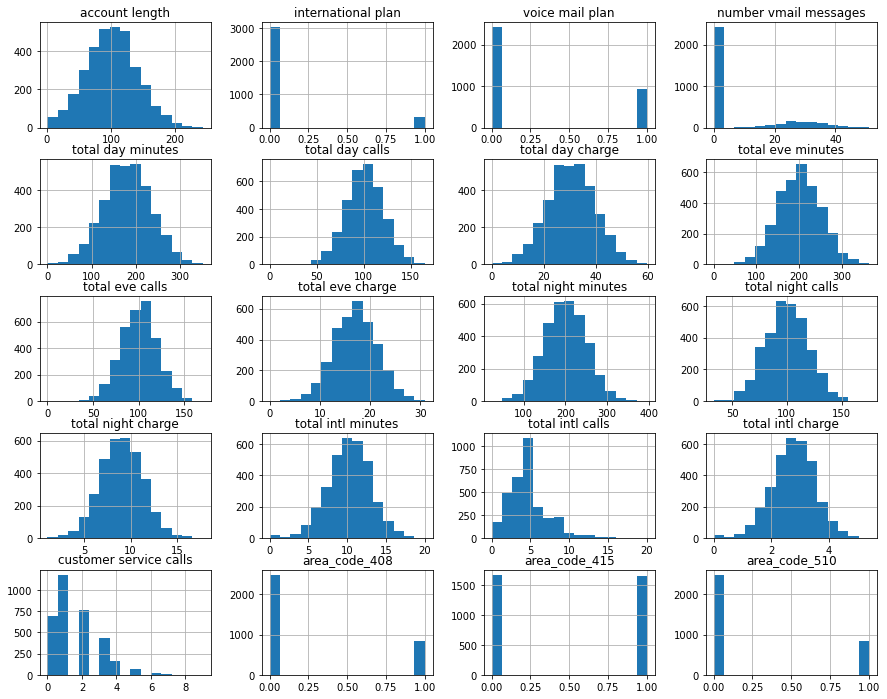

In [20]:
import matplotlib.pyplot as plt

# check distribution of values
df_final.hist(figsize=(15,12),bins = 15)
plt.show()

In [26]:
# check classes ratio
print(df_final.churn.value_counts())
print("\n")
print(df_final.churn.value_counts(normalize=True))

False    2850
True      483
Name: churn, dtype: int64


False    0.855086
True     0.144914
Name: churn, dtype: float64


The distributions tell us:

- Most customers don't use voice mail service and international plans.
- Half of the customers live in area code 415.
- The company earns more by total day calls (check total day charge).

<AxesSubplot:>

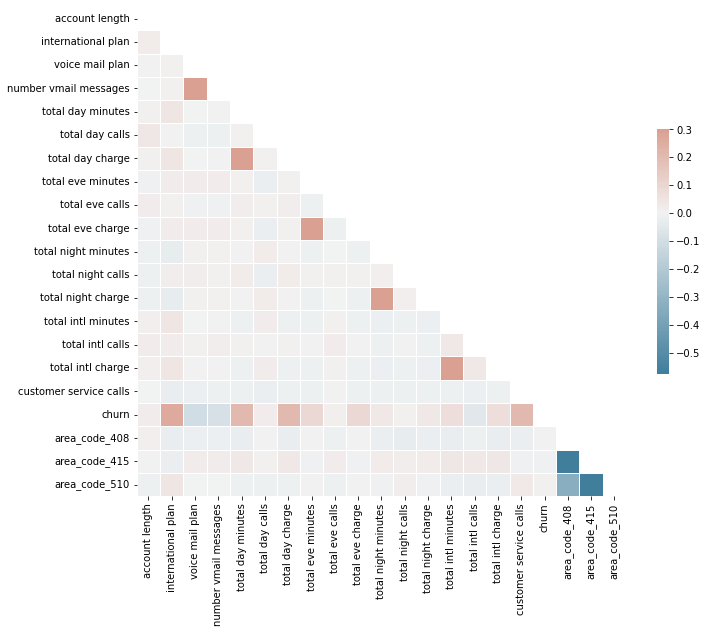

In [27]:
# some insights into the relationship between features
# observe the correlation.

import matplotlib.pyplot as plt
import seaborn as sns

# Generate a mask for the upper triangle
corr = df_final.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the correlation matrix, we observe the following things:

* There is a positive correlation between:

    - total day charge, total day minutes, and churn
    - total eve minutes and total eve charge
    - total night minutes and total night charge
    - total intl minutes and total intl charge
    - total customer service calls and churn
    - number vmail messages and voice mail
    - international plan and churn

* There is a negative correlation between:

    - churn and voice mail plan
    - churn and number vmail messages
    - churn and total intl calls

In [29]:
df_final.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area_code_408,area_code_415,area_code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,False,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,False,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,False,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,False,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,False,0,1,0


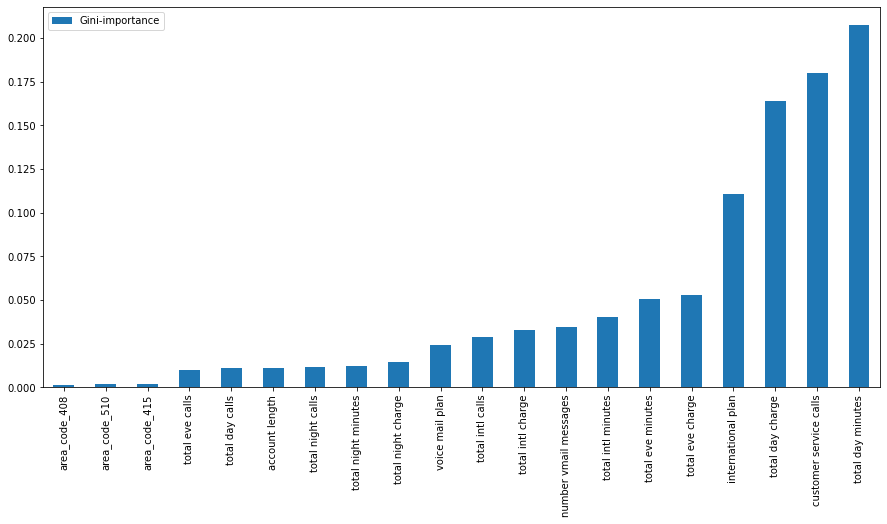

In [33]:
"""check feature importances via random forest classifier"""

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

le = preprocessing.LabelEncoder()
# apply label encoder for churn since its values are also categories
y = le.fit_transform(df_final["churn"])

# drop label column
X = df_final.drop(columns=["churn"])

# train-test split
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# selected features are selected in multicollinearity check part
feature_names = [f"feature {i}" for i in range((X.shape[1]))]
forest =  RandomForestClassifier(max_depth=5)
forest.fit(X_train, y_train)
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(df_final.drop(columns=["churn"]).columns, forest.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(15,7))
plt.show()

Gini-importance shows us which features would be most useful if we build a tree-based model with given features. According to the analysis above, the most important three features of churn are: total day charge, total day minutes, and customer service calls.

## Train/Test Split

In [46]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


le = preprocessing.LabelEncoder()

# apply label encoder for churn since its values are also categories
y = le.fit_transform(df_final["churn"])
X = df_final.drop(columns=["churn"])

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [47]:
# making sure the train and test targets are split properly
print("Train:\n",pd.DataFrame(y_train).value_counts(normalize=True))
print("\n")
print("Test:\n",pd.DataFrame(y_test).value_counts(normalize=True))

Train:
 0    0.855214
1    0.144786
dtype: float64


Test:
 0    0.854573
1    0.145427
dtype: float64


## Predictive Model

In [48]:
# Apply classifiers and decide to pick one to use in production based on the performance
# Hyperparameters of the given classifiers are chosen as trial-error 

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "XGBoost",
    "LightGBM"
]

classifiers = [

    KNeighborsClassifier(3), 
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', seed=0),
    LGBMClassifier(random_state=42),
]

## Metrics

Let's use accuracy and the F1 score while comparing the performance of different algorithms.

In [49]:
from sklearn.metrics import f1_score

## Model Results

### Classical Machine Learning Models

In [50]:
for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        acc_score = clf.score(X_test, y_test)
        y_pred = clf.predict(X_test)
        f_score = f1_score(y_test, y_pred, average='macro')
        print("accuracy:", "{:.2f}".format(acc_score), "f1_score:", "{:.2f}".format(f_score), "Model:", name)

accuracy: 0.87 f1_score: 0.67 Model: Nearest Neighbors
accuracy: 0.85 f1_score: 0.46 Model: Linear SVM
accuracy: 0.85 f1_score: 0.46 Model: RBF SVM
accuracy: 0.90 f1_score: 0.76 Model: Gaussian Process
accuracy: 0.92 f1_score: 0.82 Model: Decision Tree
accuracy: 0.90 f1_score: 0.70 Model: Random Forest
accuracy: 0.92 f1_score: 0.81 Model: Neural Net
accuracy: 0.87 f1_score: 0.69 Model: AdaBoost
accuracy: 0.85 f1_score: 0.70 Model: Naive Bayes
accuracy: 0.85 f1_score: 0.70 Model: QDA
accuracy: 0.95 f1_score: 0.88 Model: XGBoost
accuracy: 0.94 f1_score: 0.87 Model: LightGBM


accuracy: 0.94 f1_score: 0.87


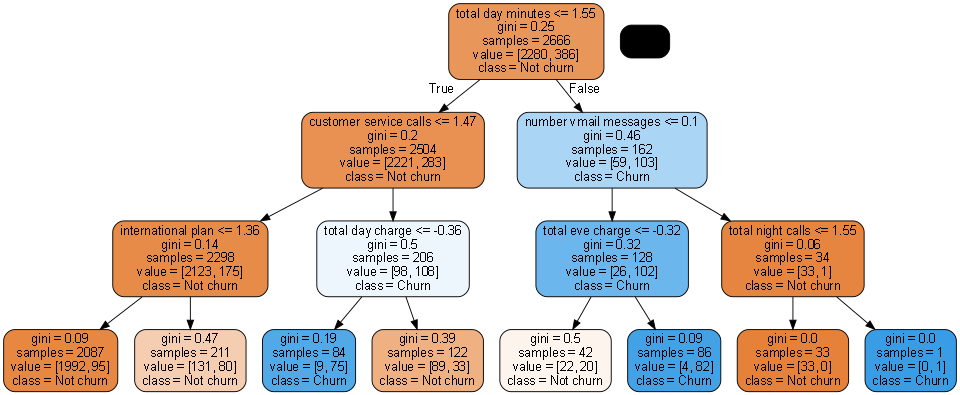

In [52]:
"""visualize the Decision Tree and see how tree-based algorithms decide for this particular problem"""

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import SVG,display, Image
import pydotplus

#Function attributes
#maximum_depth  - depth of tree
#criterion_type - ["gini" or "entropy"]
#split_type     - ["best" or "random"]

def plot_decision_tree(maximum_depth,criterion_type,split_type) :
    
    #model
    clf = DecisionTreeClassifier(max_depth=3)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("accuracy:", "{:.2f}".format(acc_score), "f1_score:", "{:.2f}".format(f_score))
    
    #plot decision tree
    graph = tree.export_graphviz(clf,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = df_final.drop(columns=["churn"]).columns.to_list(), 
                                        precision  = 2,
                                        class_names=["Not churn","Churn"],
                                        filled = True)
    
    pydot_graph = pydotplus.graph_from_dot_data(graph)
    pydot_graph.set_size('"10,10"')
    plt = Image(pydot_graph.create_png())
    display(plt)
    
plot_decision_tree(3,"gini","best")

### Deep Learning Model

In [55]:
# sequential model to initialise our ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense
# to have reproducible results
import tensorflow 
tensorflow.random.set_seed(42)

classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

loss, accuracy = classifier.evaluate(X_train, y_train,
                            batch_size=10)

print('Train accuracy:', accuracy)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
loss, accuracy = classifier.evaluate(X_test, y_test,
                            batch_size=10)

print('Test accuracy:', accuracy)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

f1_score = f1_score(y_test, y_pred)
print('Test F1-score:', f1_score)

267/267 [==============================] - 0s 833us/step - loss: 0.2874 - accuracy: 0.8807
Train accuracy: 0.8807201981544495
21/21 [==============================] - 0s 877us/step
********************
67/67 [==============================] - 0s 874us/step - loss: 0.3363 - accuracy: 0.8591
Test accuracy: 0.8590704798698425
[[551  19]
 [ 75  22]]
Test F1-score: 0.3188405797101449


The performance of DL couldn't beat the result of tree-based algorithms. In this case, we can continue with XGBoost as the algorithm will be in production due to it has combination of high accuracy and F1 score.


## Deployment issues

After the deployment of our ML model to production, we need to continue to monitor its performance since it could degrade over time due to internal or external reasons. It is recommended to update our models periodically, such as training with recent data to avoid common problems. There are two significant problems with the MLOps cycle:



Data drift: Data drift is the situation where the model’s input distribution changes. It could be caused by broken data ingestion or serving pipeline, or a change in the nature of your problem. We can resolve this issue by fixing the broken data engineering pipelines where applicable or by training our model with more data including more recent data points if there is no deterioration in the data quality.


Concept drift: Concept drift is the situation when the functional relationship between the model inputs and outputs changes. The context has changed, but the model doesn’t know about the change. Its learned patterns do not hold anymore. Hence, we need to learn a new model and even use another algorithm if our particular algorithm's performance is not good enough to use in production.